In [ ]:
#!connect jupyter --kernel-name pythonkernel --kernel-spec python3

#r "nuget:ScottPlot, 5.0.*"

Error: (1,1): error DNI211: The kernel name or alias 'pythonkernel' is already in use.

In [9]:
using System.Numerics;

static T Median<T>(this IEnumerable<T> collection) where T : INumber<T> 
{
    var orderedCollection = collection.Order().ToArray();

    var two = T.One + T.One;

    if (orderedCollection.Length == 0)
        return default(T);
    
    if (orderedCollection.Length % 2 == 0) {
        return (orderedCollection[orderedCollection.Length / 2] + orderedCollection[orderedCollection.Length / 2 - 1]) / two;
    } else {
        return orderedCollection[orderedCollection.Length / 2];
    }
}

# Weather data

Monthly average temperature for Germany and Australia

In [10]:
#r "System.Net.Http.Json"

using System.IO;
using System.Net.Http;
using System.Net.Http.Json;

var httpClient = new HttpClient();


record Hourly(DateTime[] Time, float[] Temperature_2m);
record WeatherResponse(Hourly hourly);

(string Lat, string Long) coordinatesMinden = ("52.17", "8.55");
(string Lat, string Long) coordinatesSidney = ("-33.8667", "151.1167");


var responseMinden = await httpClient.GetAsync($"https://archive-api.open-meteo.com/v1/archive?latitude={coordinatesMinden.Lat}&longitude={coordinatesMinden.Long}&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m");
var responseSidney = await httpClient.GetAsync($"https://archive-api.open-meteo.com/v1/archive?latitude={coordinatesSidney.Lat}&longitude={coordinatesSidney.Long}&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m");

// await response.Content.ReadAsStringAsync()
var rawDataMinden = await responseMinden.Content.ReadFromJsonAsync<WeatherResponse>();
var rawDataSidney = await responseSidney.Content.ReadFromJsonAsync<WeatherResponse>();


In [11]:
record MonthData(int Month, float Temperature);

var dataMinden = rawDataMinden.hourly.Time.Zip(rawDataMinden.hourly.Temperature_2m)
    .GroupBy(x => x.First.Month)
    .Select(x => new MonthData(x.Key, x.Select(y => y.Second).Median()))
    .OrderBy(x => x.Month)
    .Select(x => x.Temperature)
    .ToArray();

var dataSidney = rawDataSidney.hourly.Time.Zip(rawDataSidney.hourly.Temperature_2m)
    .GroupBy(x => x.First.Month)
    .Select(x => new MonthData(x.Key, x.Select(y => y.Second).Median()))
    .OrderBy(x => x.Month)
    .Select(x => x.Temperature)
    .ToArray();


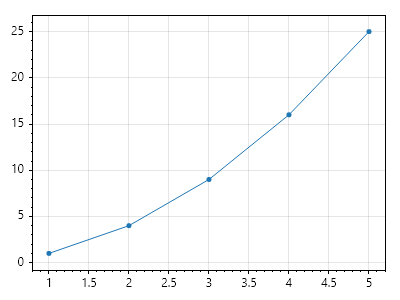

In [119]:

using Microsoft.DotNet.Interactive.Formatting;

Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);

// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plt = new();
plt.Add.Scatter(dataX, dataY);
// plt.Add.Scatter(dataX, )

// display the plot
plt

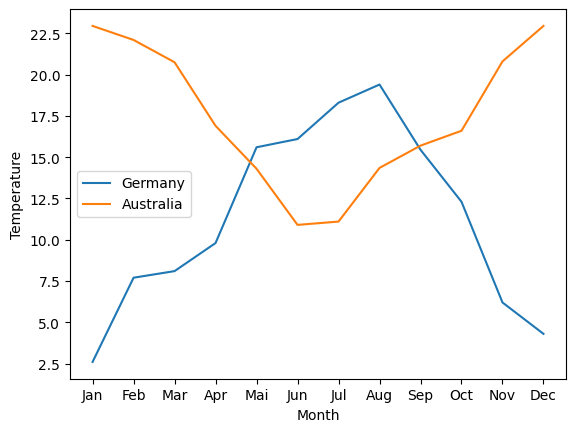

In [13]:
#!set --value @csharp:dataMinden --name minden
#!set --value @csharp:dataSidney --name sidney

import matplotlib.pyplot as plt

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(month_names, minden, label="Germany")
plt.plot(month_names, sidney, label="Australia")
plt.ylabel('Temperature')
plt.xlabel('Month')
plt.legend()
plt.show()


# Aufgabe 2

C:\Users\Colin\AppData\Local\Temp\ipykernel_2080\1958067480.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


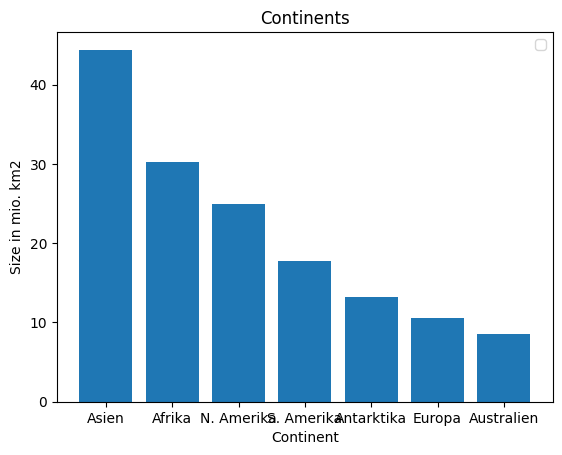

In [14]:
import matplotlib.pyplot as plt

continents = [
    "Asien", 	    #  47 	44,4 	29,68 	8,7 	4750 	59,4 	107,0
 	"Afrika", 	    #  55 	30,3 	20,25 	5,9 	1400 	17,5 	46,2
 	"N. Amerika", 	#  23 	24,9 	16,64 	4,9 	605 	7,6 	21,3
 	"S. Amerika",   #  13 	17,8 	11,90 	3,5 	441 	5,5 	24,7
 	"Antarktika", 	#  - 	13,2 	8,82 	2,6 	0,001 	0 	0
 	"Europa", 	    #  49 	10,5 	7,02 	2,1 	730 	9,4 	69,4
 	"Australien"    #  14 	8,5 	5,68 	1,7 	45 	0,6 	5,3
]

continent_sizes = [
    44.4,
    30.3,
    24.9,
    17.8,
    13.2,
    10.5,
    8.5  
]

continent_psizes = [
    8.7,
    5.9,
    4.9,
    3.5,
    2.6,
    2.1,
    1.7
]

plt.bar(continents, continent_sizes)

plt.ylabel('Size in mio. km2')
plt.xlabel('Continent')
plt.legend()
plt.title("Continents")
plt.show()


([<matplotlib.patches.Wedge at 0x1fee7885e50>,
 [Text(1.0591684609388503, 0.29692115342701275, 'Asien: 8.7%'),
  Text(0.8182296251830913, 0.7351872417777245, 'Afrika: 5.9%'),
  Text(0.5268980108860196, 0.9655974762417081, 'N. Amerika: 4.9%'),
  Text(0.2567897011167372, 1.0696069602430498, 'S. Amerika: 3.5%'),
  Text(0.04836471839433644, 1.0989362374654121, 'Antarktika: 2.6%'),
  Text(-0.11383562945594455, 1.0940938942642762, 'Europa: 2.1%'),
  Text(-0.24332884180451153, 1.0727493065698412, 'Australien: 1.7%'),
  Text(-0.6632221308602602, -0.8775741593376462, 'Water: 70.6%')])

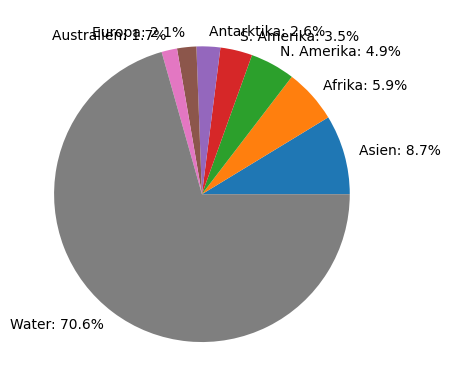

In [15]:
import matplotlib.pyplot as plt

p_water = 100.0;

for s in continent_psizes:
    p_water = p_water - s

continent_psizes2 = continent_psizes.copy()
continent_psizes2.append(p_water)

continents2 = []

for i in range(0, len(continents)):
    c = continents[i]
    p = continent_psizes2[i]
    continents2.append(f'{c}: {p}%')
continents2.append(f'Water: {p_water}%')

fig, ax = plt.subplots()
ax.pie(continent_psizes2, labels=continents2)

# Aufgabe 3

Durchschnittsnoten berechnen

In [102]:
var r = new Random(420);
string[] courses = ["Mathe 3", "KI", "Datenanalyse", "Compilerbau", "Softwaretechnik", "Wissenschaftliches Arbeiten"];

IEnumerable<(string Course, double Mark)> GenerateRandomMarks(IEnumerable<string> courses) => 
    courses.Select(x => (x, ((float)r.Next(2, 12) / 2.0)));


var marks = GenerateRandomMarks(courses).ToArray();

marks

index value 0 (Mathe 3, 1.5) Item1 Mathe 3 Item2 1.5 1 (KI, 1) Item1 KI Item2 1 2 (Datenanalyse, 2.5) Item1 Datenanalyse Item2 2.5 3 (Compilerbau, 2) Item1 Compilerbau Item2 2 4 (Softwaretechnik, 5) Item1 Softwaretechnik Item2 5 5 (Wissenschaftliches Arbeiten, 3.5) Item1 Wissenschaftliches Arbeiten Item2 3.5

In [17]:
record Mark(string Course, double Value);

var averageMarks = Enumerable.Range(1, 10)
    .SelectMany(_ => GenerateRandomMarks(courses))
    .GroupBy(x => x.Course)
    .Select(x => new Mark(x.Key, x.Select(y => y.Mark).Average()))
    .ToArray();

averageMarks

index value 0 Mark { Course = Mathe 3, Value = 2.4 } Course Mathe 3 Value 2.4 1 Mark { Course = KI, Value = 3.15 } Course KI Value 3.15 2 Mark { Course = Datenanalyse, Value = 2.55 } Course Datenanalyse Value 2.55 3 Mark { Course = Compilerbau, Value = 3.05 } Course Compilerbau Value 3.05 4 Mark { Course = Softwaretechnik, Value = 3.65 } Course Softwaretechnik Value 3.65 5 Mark { Course = Wissenschaftliches Arbeiten, Value = 2.5 } Course Wissenschaftliches Arbeiten Value 2.5

In [18]:
#!set --value @csharp:averageMarks --name averageMarks

averageMarks

Course,"""Mathe 3"""
Value,2.4
Course,"""KI"""
Value,3.15
Course,"""Datenanalyse"""
Value,2.55
Course,"""Compilerbau"""
Value,3.05
Course,"""Softwaretechnik"""
Value,3.65
Course,"""Wissenschaftliches Arbeiten"""


In [103]:
var multipleMarks = Enumerable.Range(1, 10)
    .Select(_ => GenerateRandomMarks(courses).Select(x => new Mark(x.Course, x.Mark)).ToArray())
    .ToList(); // <- otherwise a new collection is generated every time the value is requested (including #!set)

In [ ]:
#!set --value @csharp:multipleMarks --name multiple_marks

multiple_marks

Create a series with random marks 

In [106]:
#!set --value @csharp:multipleMarks --name multiple_marks

import pandas as pd


mark_series = []
for m in multiple_marks:
    course = [x['Course'] for x in m]
    mark = [x['Value'] for x in m]

    mark_series.append(pd.Series(mark, index=course))


marks1 = mark_series[0]
marks2 = mark_series[1]

# pd.mean(marks1, marks2)

(marks1 + marks2) / 2

Mathe 3                        1.75
KI                             3.50
Datenanalyse                   5.50
Compilerbau                    2.00
Softwaretechnik                3.75
Wissenschaftliches Arbeiten    2.50
dtype: float64

In [110]:
marks1

Mathe 3                        1.0
KI                             1.5
Datenanalyse                   5.5
Compilerbau                    1.5
Softwaretechnik                4.5
Wissenschaftliches Arbeiten    2.5
dtype: float64

In [113]:
marks2

Mathe 3                        2.5
KI                             5.5
Datenanalyse                   5.5
Compilerbau                    2.5
Softwaretechnik                3.0
Wissenschaftliches Arbeiten    2.5
dtype: float64